# How Iran Performed in the Olympics?

# Region and Domain:

## Iran and Sport ad Politics:

We would like to see how Iran performed in the Summer Olympics. Especifically, we would like to know how it performed before and after the revolution. For that, we are going to use the percentile parameter. Following is the definition of the percentile formular:

$$Iran\_perc = 100\% \times \frac{Number\ of \ participant \ countires - Iran's Rank}{Number\ of \ participant \ countires}$$

# Research Question:

Has the performance of Iran increased/decreased in Asian/Olympics Games.

# Public Data :

We need two public data sets:

- Iran rank in the Olympics ([link](https://en.wikipedia.org/wiki/Iran_at_the_Olympics))
- Number of participants in the Olympics ([link](https://en.wikipedia.org/wiki/Summer_Olympic_Games))

# Code :

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook
plt.style.use('seaborn-colorblind')

In [48]:
rank = pd.read_csv('iran.csv',encoding = "ISO-8859-1", header = 0).dropna()
rank.Year = rank.Year.apply(lambda x: int(x[1:]))
nations = pd.read_csv('nations.csv',encoding = "ISO-8859-1", header = 0)
nations.Year = nations.Year.apply(lambda x: int(x))

In [61]:
iran_participants = pd.merge(rank, nations, on = 'Year', how = 'left')

In [50]:
iran_participants.head()

,Year,Rank,Nations
0,1948,34.0,59.0
1,1952,30.0,69.0
2,1956,14.0,72.0
3,1960,27.0,83.0
4,1964,34.0,93.0


In [63]:
iran_participants['Percentile'] = (iran_participants['Nations']-iran_participants['Rank'])/iran_participants['Nations']*100
iran_participants.head()

,Year,Rank,Nations,Percentile
0,1948,34.0,59.0,42.372881
1,1952,30.0,69.0,56.521739
2,1956,14.0,72.0,80.555556
3,1960,27.0,83.0,67.469880
4,1964,34.0,93.0,63.440860


<IPython.core.display.Javascript object>


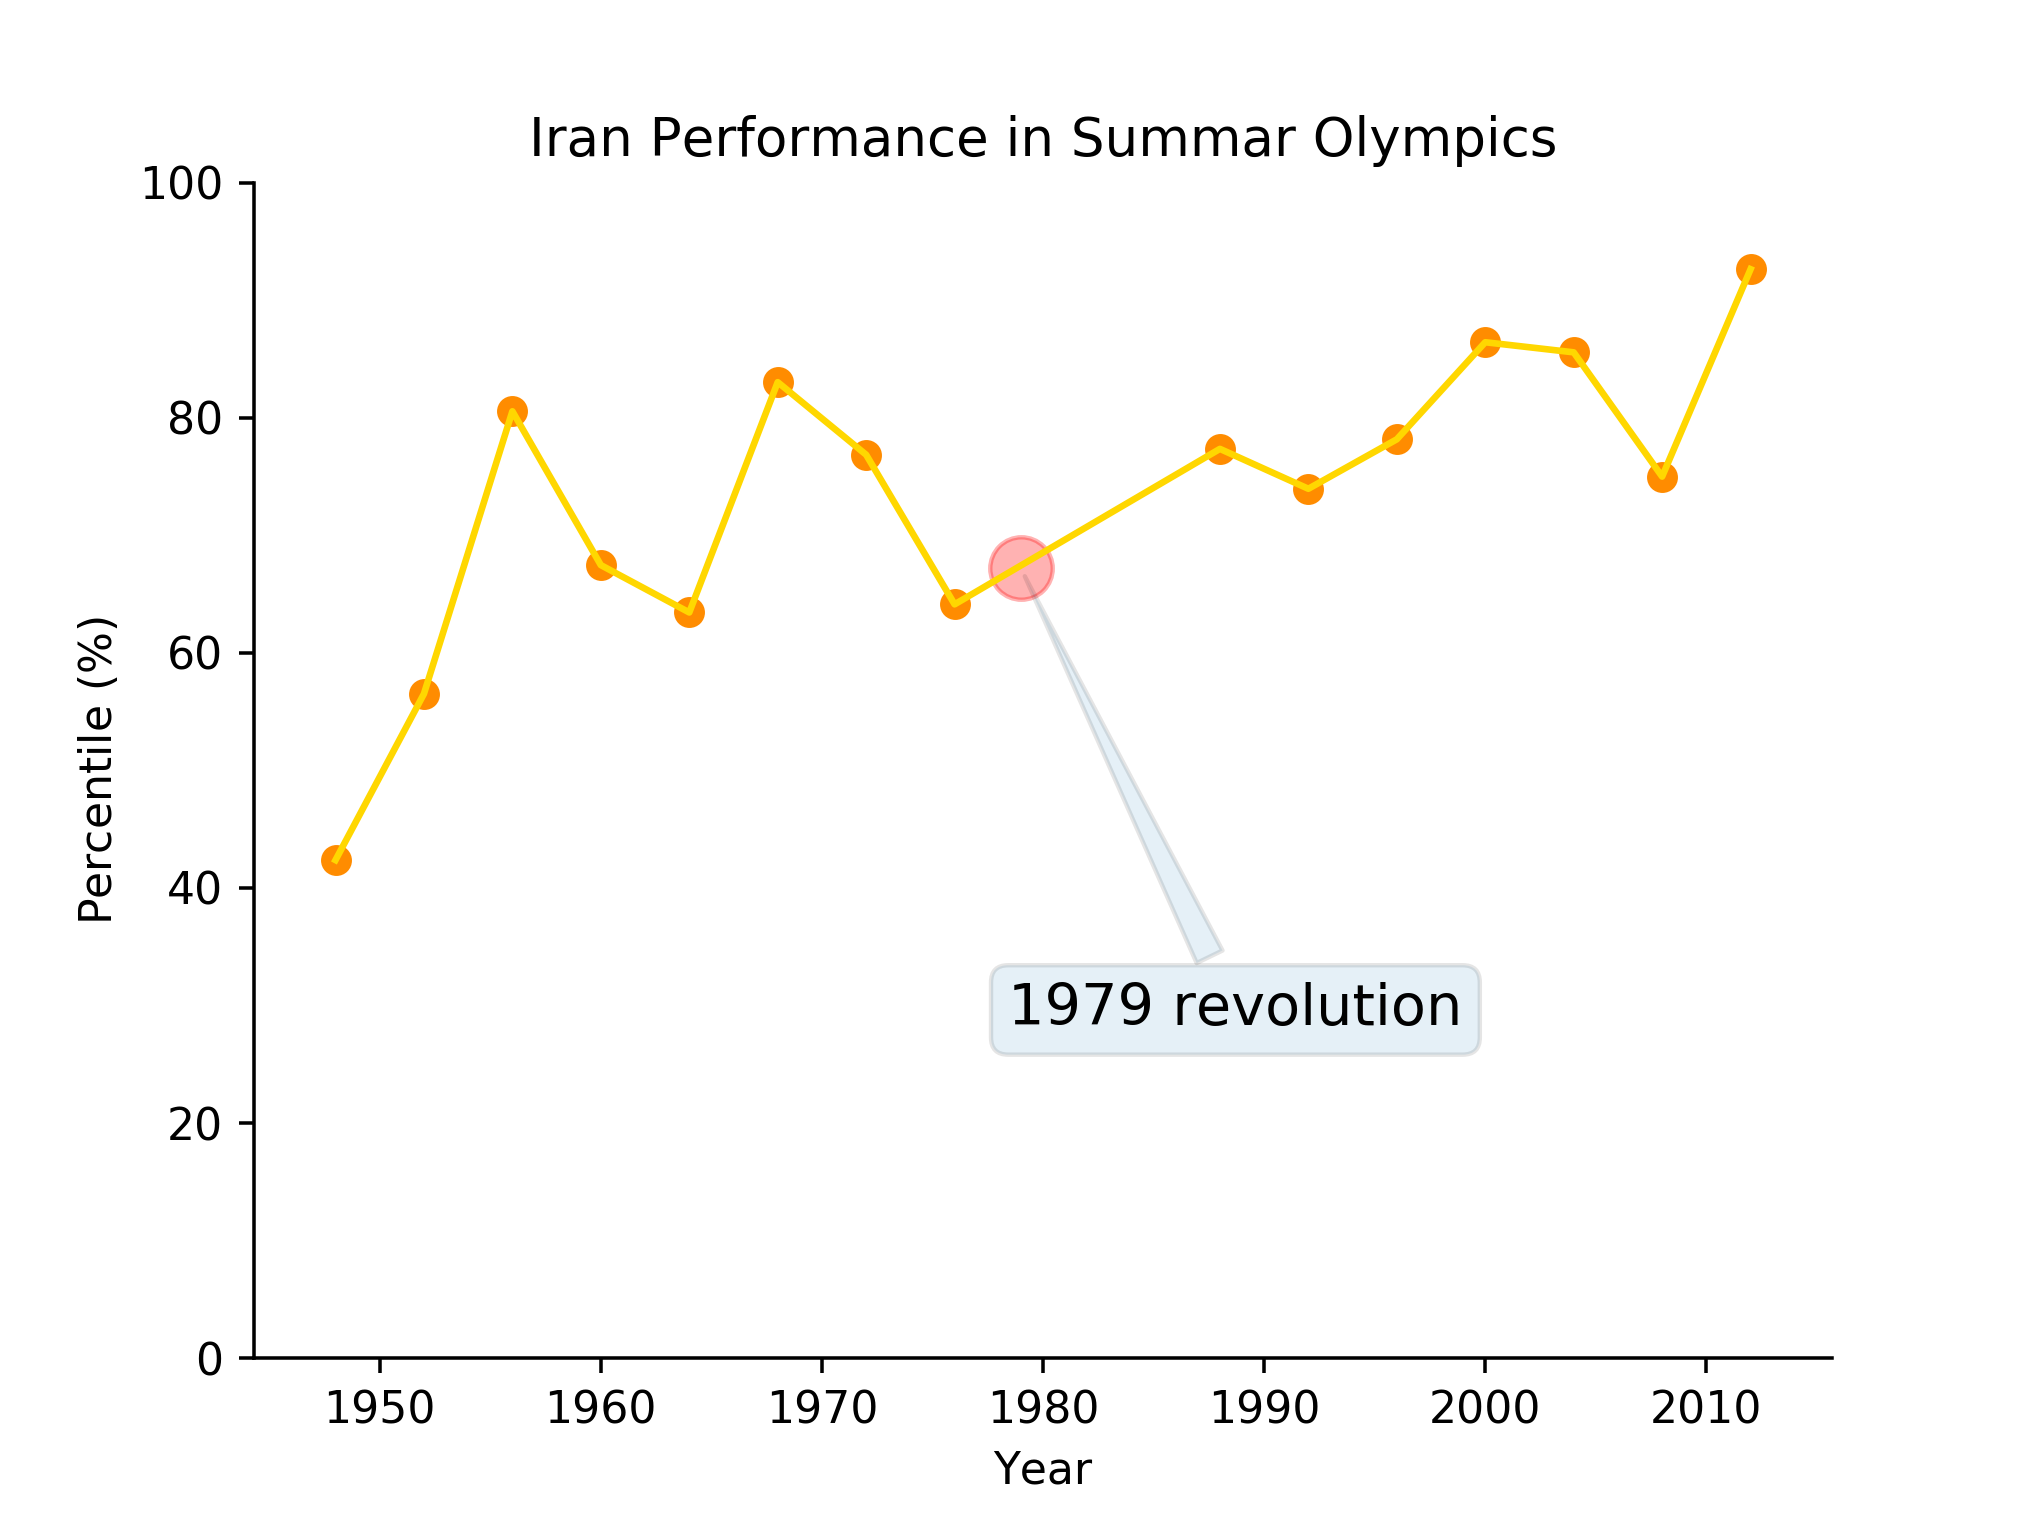

In [98]:
plt.plot(iran_participants['Year'], iran_participants['Percentile'], color = 'gold')
plt.scatter(iran_participants['Year'], iran_participants['Percentile'], color = 'darkorange')
plt.scatter(1979, 67.2, color = 'red', s =200, alpha= 0.3)
plt.xlabel('Year')
plt.ylim([0,100])

plt.ylabel('Percentile ($\%$)')
plt.title('Iran Performance in Summar Olympics')
#Removing the frame
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

#annotating Iran revolution
plt.annotate('1979 revolution', xy=(1979, 67.2),  xycoords='data',
             xytext=(100,-100), textcoords='offset points',
             size=13, ha='right', va="center",
             bbox=dict(boxstyle="round", alpha=0.1),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1));


# Visualization Diagnostics

We need to describe and relate your visual in regards to Cairo's principles of:
 1. truthfulness (avoiding misleading representation)
 
 We increased the y range to capture all the 0-100 percentile to assure that we are not limiting the range. Moreover, we are not maginifying, hiding, limiting any axis. Moreover, we used scatter plot on top of the line plot to demonstrate the missing olympics.
 
 2. beauty (color, fonts, layout should be appropriate):
 
 We chose the gold-darkorange-red color set that is very pleasent for eyes. Moreover, we used transparent boxes and circles to make the figure look more pleasant.
 
 3. functionality (e.g. choosing charting type that is appropriate for the research question),
 
 We worked on numerical, and time series data. Best type of figures for such problems are line graphs. We can also add a scatter plot on top of it to assure that the the missing data re obvious.
 
 4. insightfulness (i.e. producing an "aha" response in the viewer)
 
 I believe several aha points might be driven from this figure. One is that Iran missed the Olympics right after its revloution. Secondly, after the revolution, Iran's performance has been improved slowly and consistently and reached to a record at 2016.